## Part 2: FTP Optimisation Helper Scripts

This script calculates the first order and second order derivatives of a defined function $f$. Additionally it will show the Gradient and Hessian Matrix of the function. Please also add a point which will be set into the gradient and the Hessian.

In [16]:
from sympy import symbols, diff, Matrix
from IPython.display import display, Latex

def calculate_gradient_Hessian():
    # Define the symbols:
    x, y = symbols('x y')
    
    # Define your function and point here:
    f = (x-2)**4 + (x-2*y)**2
    x_val, y_val = 0, 0

    # Compute first order partials:
    f_x = diff(f, x)
    f_y = diff(f, y)

    # Compute second order partials:
    f_xx = diff(f_x, x)   # ∂²f/∂x²
    f_yy = diff(f_y, y)   # ∂²f/∂y²
    f_xy = diff(f_x, y)   # ∂²f/∂y∂x
    f_yx = diff(f_y, x)   # ∂²f/∂x∂y

    # Compute the gradient and Hessian:
    grad = [f_x, f_y]
    H = [[f_xx, f_yx], [f_xy, f_yy]]

    # Evaluate at the given point:
    derivatives_at_point = {
    "∂f/∂x": f_x.subs({x: x_val, y: y_val}),
    "∂f/∂y": f_y.subs({x: x_val, y: y_val}),
    "∂²f/∂x²": f_xx.subs({x: x_val, y: y_val}),
    "∂²f/∂y²": f_yy.subs({x: x_val, y: y_val}),
    "∂²f/∂y∂x": f_xy.subs({x: x_val, y: y_val}),
    "∂²f/∂x∂y": f_yx.subs({x: x_val, y: y_val})
    }

    # Compute Gradient and Hessian at point:
    gradient_at_point = [derivatives_at_point["∂f/∂x"], derivatives_at_point["∂f/∂y"]]
    hessian_at_point = [[derivatives_at_point["∂²f/∂x²"], derivatives_at_point["∂²f/∂x∂y"]], 
                    [derivatives_at_point["∂²f/∂y∂x"], derivatives_at_point["∂²f/∂y²"]]]

    # Print out the results:
    print("First order derivatives:")
    display(Latex(r'$\frac{\partial f}{\partial x} = %s$' % f_x)) 
    display(Latex(r'$\frac{\partial f}{\partial y} = %s$' % f_y))
    print("\nSecond order derivatives:")
    display(Latex(r'$\frac{\partial^2 f}{\partial x^2} = %s$' % f_xx))
    display(Latex(r'$\frac{\partial^2 f}{\partial y^2} = %s$' % f_yy))
    display(Latex(r'$\frac{\partial^2 f}{\partial y \partial x} = %s$' % f_xy))
    display(Latex(r'$\frac{\partial^2 f}{\partial x \partial y} = %s$' % f_yx))
    print("\nGradient:")
    display(Latex(r'$\nabla f = %s$' % Matrix(grad)))
    print("\nHessian:")
    display(Latex(r'$H = %s$' % Matrix(H)))
    
    print(f"\nfunction at starting point: {(x_val, y_val)}")
    print('function at starting point =', f.subs({x: x_val, y: y_val}))

    print(f"\nGradient at starting point {(x_val, y_val)}:")
    print('Gradient at starting point =', gradient_at_point)

    print(f"\nHessian at starting point {(x_val, y_val)}:")
    print('Hessian at starting point =', hessian_at_point)

    

calculate_gradient_Hessian()


First order derivatives:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


Second order derivatives:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


Gradient:


<IPython.core.display.Latex object>


Hessian:


<IPython.core.display.Latex object>


function at starting point: (0, 0)
function at starting point = 16

Gradient at starting point (0, 0):
Gradient at starting point = [-32, 0]

Hessian at starting point (0, 0):
Hessian at starting point = [[50, -4], [-4, 8]]


This script performs **Gradient Descent with successive halving**. You see the table. Please define the function and define the starting point as well as the amount of betas needed. 
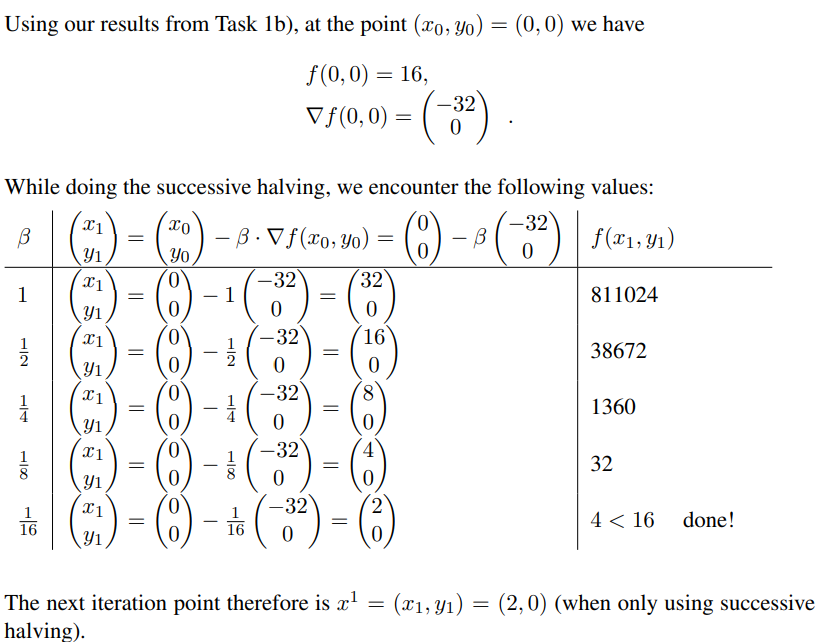

In [21]:
import sympy as sp
from IPython.display import display, Latex

# Define symbols
x, y = sp.symbols('x y')

# Define the function and the starting point
f = (x-2)**4+(x-2*y)**2
x0, y0 = 0,0
betas = [1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64]

print("The function value at starting point:", f.subs({x: x0, y: y0}))
print("Gradient at starting point:", grad_f.subs({x: x0, y: y0}))

# Gradient of f
grad_f = sp.Matrix([sp.diff(f, x), sp.diff(f, y)])

# Table headers
table = [["Beta", "New Point (x1, y1)", "f(x1, y1)"]]

# Function to calculate new point and function value
def calculate_new_point_and_value(beta, x0, y0, grad_f, f):
    new_point = sp.Matrix([x0, y0]) - beta * grad_f.subs({x: x0, y: y0})
    new_f_value = f.subs({x: new_point[0], y: new_point[1]})
    return new_point, new_f_value

# Create the table:
table = [["beta", "(x1,y1) = (x0,y0) - beta*∇f(x0, y0)", "f(x1, y1)"]]
# Add values for each beta
for beta in betas:
    new_point, new_f_value = calculate_new_point_and_value(beta, x0, y0, grad_f, f)
    table.append([beta, new_point, new_f_value])
# Display table
display(Latex(r'\begin{array}{|c|c|c|} \hline %s \end{array}' % r' \\ \hline'.join([' & '.join([str(cell) for cell in row]) for row in table])))


The function value at starting point: 16
Gradient at starting point: Matrix([[-32], [0]])


<IPython.core.display.Latex object>

Here we add the **parabola Fitting**. You will need to add the beta, which was determined and the values of $P(0)=f\left(x^i\right)$ which is the function value at the starting point. 
You will then need to specify $P(\beta)=f\left(x^i-\beta \nabla f\left(x^i\right)\right.$ and $P(2 \beta)$ = $f\left(x^i-2 \beta \nabla f\left(x^i\right)\right).$
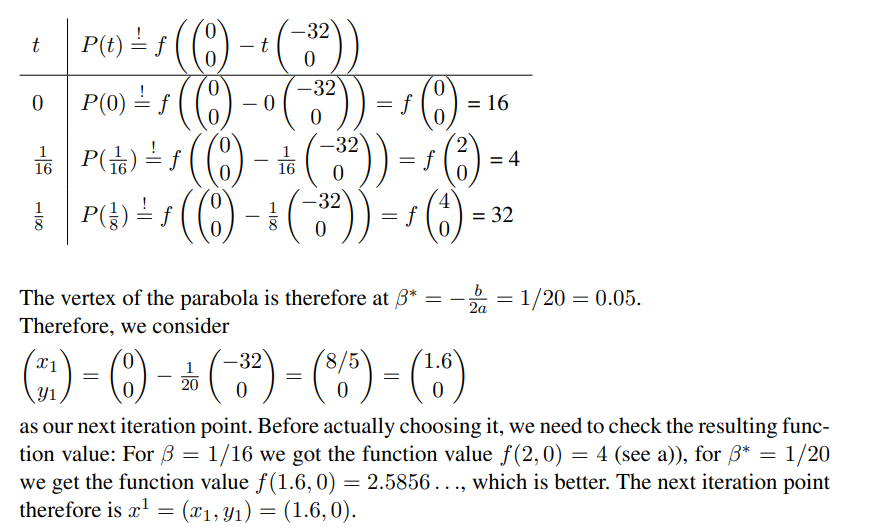

In [47]:
import sympy as sp
from IPython.display import display, Latex

# Define the function and starting point and the beta value found
f = (x-2)**4+(x-2*y)**2
x0, y0 = 0,0
BETA = 1/16

# CaLculations: 
BETA2 = 2 * BETA 

starting_point = f.subs({x: x0, y: y0})
point_at_beta = sp.Matrix([x0, y0]) - BETA * grad_f.subs({x: x0, y: y0})
value_beta = f.subs({x: point_at_beta[0], y: point_at_beta[1]})
point_at_beta2 = sp.Matrix([x0, y0]) - BETA2 * grad_f.subs({x: x0, y: y0})
value_beta2 = f.subs({x: point_at_beta2[0], y: point_at_beta2[1]})

display(Latex(r'$P(0) = f\left(x^i\right) = %s$' % starting_point))
display(Latex(r'$P(\beta) = f\left(x^i-\beta \nabla f\left(x^i\right)\right) = %s$' % value_beta))
display(Latex(r'$P(2 \beta) = f\left(x^i-2 \beta \nabla f\left(x^i\right)\right) = %s$' % value_beta2))

display(Latex(r'$\beta^* = \frac{-b}{2 a} = \frac{\beta}{2} \cdot \frac{3 f\left(x^i\right)-4 f\left(x^i-\beta \nabla f\left(x^i\right)\right)+f\left(x^i-2 \beta \nabla f\left(x^i\right)\right)}{f\left(x^i\right)-2 f\left(x^i-\beta \nabla f\left(x^i\right)\right)+f\left(x^i-2 \beta \nabla f\left(x^i\right)\right)}$'))
display(Latex(r'$\beta^* = \frac{\beta}{2} \cdot \frac{3 P(0)-4 P(\beta)+P(2 \beta)}{P(0)-2 P(\beta)+P(2 \beta)}$'))
BSTAR = BETA/2 * ((3*starting_point - 4*value_beta + value_beta2)/(starting_point-2*value_beta +value_beta2))
display(Latex(r'$\beta^* = %s$' % BSTAR))

point_at_bstar = sp.Matrix([x0, y0]) - BSTAR * grad_f.subs({x: x0, y: y0})
value_bstar = f.subs({x: point_at_bstar[0], y: point_at_bstar[1]})
display(Latex(r'$x_1 = x^i-\beta^* \nabla f\left(x^i\right) = %s$' % point_at_bstar))
display(Latex(r'$P(\beta^*) = f\left(x^i-\beta^* \nabla f\left(x^i\right)\right) = %s$' % value_bstar))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [49]:
from sympy import symbols, diff, Matrix, simplify
from IPython.display import display, Latex

# Define symbols
x, y = symbols('x y')

# Define the function and the starting point and the number of iterations:
f = (x-2)**4+(x-2*y)**2
x_val, y_val = 0,0
num_iterations = 2

# Compute partial derivatives first order   
f_x = diff(f, x)
f_y = diff(f, y)

# Compute partial derivatives second order
f_xx = diff(f_x, x)   # ∂²f/∂x²
f_yy = diff(f_y, y)   # ∂²f/∂y²
f_xy = diff(f_x, y)   # ∂²f/∂y∂x
f_yx = diff(f_y, x)   # ∂²f/∂x∂y

# Compute gradient
grad = Matrix([f_x, f_y])
display(Latex(r'$\nabla f = %s$' % grad))

# Compute Hessian
H = Matrix([[f_xx, f_yx], [f_xy, f_yy]])
display(Latex(r'$H = %s$' % H))

# Compute the gradient at the starting point
print(f"\n The gradient and the Hessian at starting point ({x_val},{y_val})")
gradient_at_point = grad.subs({x: x_val, y: y_val})
display(Latex(r'$\nabla f\left(x^i\right) = %s$' % gradient_at_point))

# Compute the Hessian at the starting point
hessian_at_point = H.subs({x: x_val, y: y_val})
display(Latex(r'$H\left(x^i\right) = %s$' % hessian_at_point))

# Compute the inverse of the Hessian at the starting point
hessian_inverse_at_point = hessian_at_point.inv()
display(Latex(r'$H\left(x^i\right)^{-1} = %s$' % hessian_inverse_at_point))

# For Loop for the Newton's method
for i in range(num_iterations):
    print(f"We calculate for the iteration {i+1}:")
    display(Latex(r'$\left(\begin{array}{l}x^{i+1} \\ y^{i+1}\end{array}\right) = \left(\begin{array}{l}x^i \\ y^i\end{array}\right) - H\left(x^i\right)^{-1} \cdot \nabla f\left(x^i\right)$'))
    display(Latex(r'$\left(\begin{array}{l}x^{i+1} \\ y^{i+1}\end{array}\right) = \left(\begin{array}{l} %s\\ %s \end{array}\right) - %s \cdot %s$' % (x_val, y_val, hessian_inverse_at_point, gradient_at_point)))
    new_point = Matrix([x_val, y_val]) - hessian_inverse_at_point * gradient_at_point
    display(Latex(r'$\left(\begin{array}{l}x^{i+1} \\ y^{i+1}\end{array}\right) = %s$' % new_point))
    display(Latex(r'$f\left(x^{i+1}\right) = %s$' % f.subs({x: new_point[0], y: new_point[1]})))
    x_val, y_val = new_point[0], new_point[1]
    gradient_at_point = grad.subs({x: x_val, y: y_val})
    hessian_at_point = H.subs({x: x_val, y: y_val})
    hessian_inverse_at_point = hessian_at_point.inv()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


 The gradient and the Hessian at starting point (0,0)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We calculate for the iteration 1:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We calculate for the iteration 2:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>